# 데이터마이닝 과제 #1 선형회귀

## 정보융합학부 2021204051 우지윤

<hr>

필요한 라이브러리 임포트

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import *
from sklearn import metrics

데이터 불러오기

In [2]:
import pandas as pd
df = pd.read_csv('student-mat.csv', sep=';')

데이터 설명

- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)

- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4  higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4  higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n\<3, else 4)

- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)

- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)

- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

데이터 첫 5행

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


데이터 끝에서부터 2행

In [4]:
df.tail(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


데이터 길이

In [5]:
# Showing The Length of The Data
print("The Length of The Data: ", len(df))

The Length of The Data:  395


데이터 모양

In [6]:
# Showing The Shape of The Data
print("The Shape of The Data: ", df.shape)

The Shape of The Data:  (395, 33)


데이터 구성, 행과 열, 컬럼명, 컬럼 자료형 등 확인

In [7]:
# Showing The Information of The Data
print("The Information of The Data: ")
print(df.info())

The Information of The Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-

데이터 수치적 계산 가능한 컬럼 대해 요약 통계량 확인

In [8]:
# Showing The Statistical Calculations
print("The Statistical Calculations: ")
print(df.describe().T)

The Statistical Calculations: 
            count       mean       std   min   25%   50%   75%   max
age         395.0  16.696203  1.276043  15.0  16.0  17.0  18.0  22.0
Medu        395.0   2.749367  1.094735   0.0   2.0   3.0   4.0   4.0
Fedu        395.0   2.521519  1.088201   0.0   2.0   2.0   3.0   4.0
traveltime  395.0   1.448101  0.697505   1.0   1.0   1.0   2.0   4.0
studytime   395.0   2.035443  0.839240   1.0   1.0   2.0   2.0   4.0
failures    395.0   0.334177  0.743651   0.0   0.0   0.0   0.0   3.0
famrel      395.0   3.944304  0.896659   1.0   4.0   4.0   5.0   5.0
freetime    395.0   3.235443  0.998862   1.0   3.0   3.0   4.0   5.0
goout       395.0   3.108861  1.113278   1.0   2.0   3.0   4.0   5.0
Dalc        395.0   1.481013  0.890741   1.0   1.0   1.0   2.0   5.0
Walc        395.0   2.291139  1.287897   1.0   1.0   2.0   3.0   5.0
health      395.0   3.554430  1.390303   1.0   3.0   4.0   5.0   5.0
absences    395.0   5.708861  8.003096   0.0   0.0   4.0   8.0  75.0
G1 

데이터 고유값 수 출력

In [9]:
# Showing The Unique Data
print("\nThe Unique Data: ")
print(df.nunique())


The Unique Data: 
school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64


데이터 결측치 확인

In [10]:
# Looking For The Missing Value in Each Column
print("\nLooking For The Missing Value in Each Column: ")
print(df.isnull().sum())


Looking For The Missing Value in Each Column: 
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


<hr>

In [11]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

나이별 결석 barplot

<Axes: xlabel='age', ylabel='absences'>

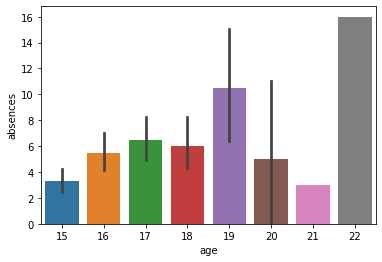

In [12]:
sns.barplot(x=df['age'], y=df['absences'])

건강 상태별 공부 시간 barplot

<Axes: xlabel='health', ylabel='studytime'>

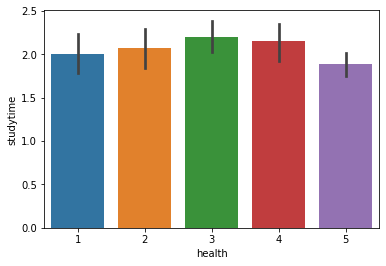

In [13]:
sns.barplot(x=df['health'], y=df['studytime'])

엄마 직업과 아빠 직업 scatter plot

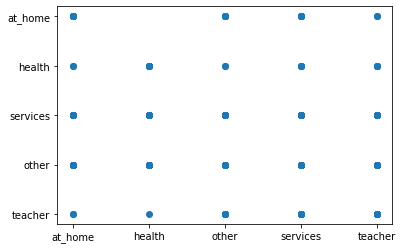

In [14]:
plt.scatter(x=df['Mjob'], y=df['Fjob'])

실패 대비 G3 scatter plot

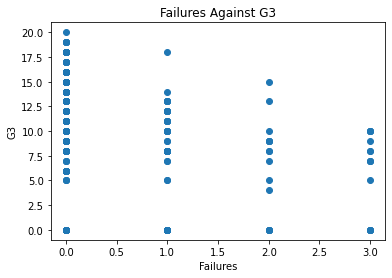

In [15]:
%matplotlib inline

plt.scatter(df['failures'], df['G3'])
plt.xlabel('Failures')
plt.ylabel('G3')
plt.title('Failures Against G3')
plt.show()

workday 알코올 소비량과 weekday 알코올 소비량 scatter plot

Text(0, 0.5, 'weekday alcohol')

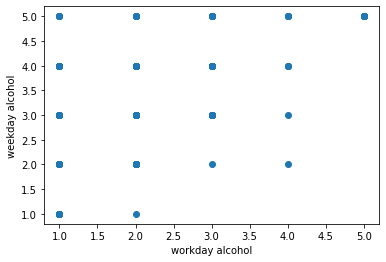

In [16]:
plt.scatter(x=df['Dalc'], y=df['Walc'])
plt.xlabel('workday alcohol')
plt.ylabel('weekday alcohol')

집->학교 시간 pie chart

Text(0, 0.5, '')

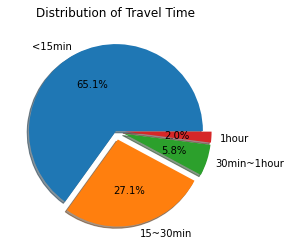

In [17]:
travel_count = df['traveltime'].value_counts()
explode = [0, 0.10, 0.1, 0.10]
travel_tm = ['<15min', '15~30min', '30min~1hour', '1hour']

# Create a pie chart
travel_count.plot.pie(autopct='%1.1f%%', shadow=True, explode=explode, labels=travel_tm)
plt.title('Distribution of Travel Time')
plt.ylabel('') # y label 비게

학교 고른 이유 pie chart

Text(0, 0.5, '')

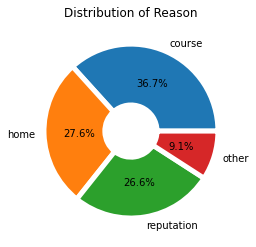

In [18]:
reason_count = df['reason'].value_counts()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

# Create a pie chart
reason_count.plot.pie(autopct='%1.1f%%', wedgeprops=wedgeprops)
plt.title('Distribution of Reason')
plt.ylabel('') # y label 비게

학생 보호자 pie chart

Text(0, 0.5, '')

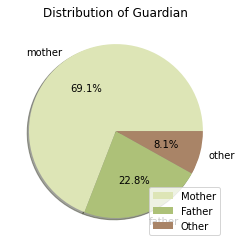

In [19]:
gd_count = df['guardian'].value_counts()
guard = ['Mother', 'Father', 'Other']
my_colors = ["#dde5b6", "#adc178", "#a98467", "#6c584c"]

# Create a pie chart
gd_count.plot.pie(autopct='%1.1f%%', shadow=True, colors=my_colors)
plt.legend(guard)
plt.title('Distribution of Guardian')
plt.ylabel('') # y label 비게

가족 관계 퀄리티 histogram

(array([  8.,   0.,  18.,   0.,   0.,  68.,   0., 195.,   0., 106.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

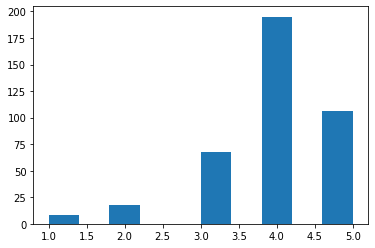

In [20]:
plt.hist(df['famrel'])

하교 후 자유시간 histogram

(array([ 19.,   0.,  64.,   0.,   0., 157.,   0., 115.,   0.,  40.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 [<matplotlib.patches.Polygon at 0x205507ab310>])

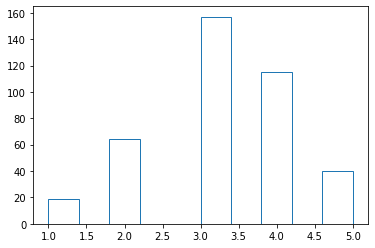

In [21]:
plt.hist(df['freetime'], histtype='step')

학교 countplot

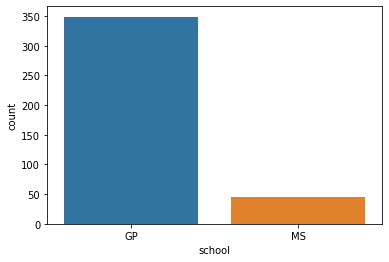

In [22]:
# Checking The School Column
sns.countplot(x='school', data=df)
plt.show()

성별 countplot

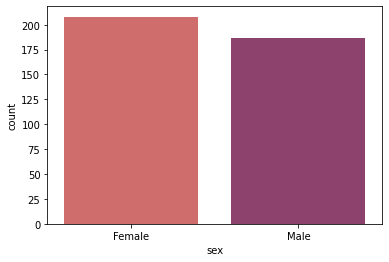

In [23]:
# Checking The Sex Column
mask_sex = {'F':'Female',
            'M':'Male'}

df['sex'] = df['sex'].map(mask_sex)
sns.countplot(x=df['sex'], palette='flare')
plt.show()

학교와 성별 countplot

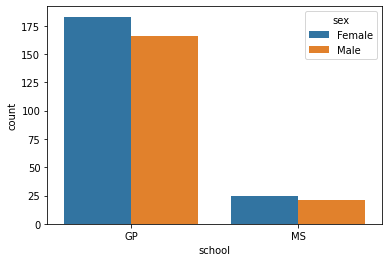

In [24]:
sns.countplot(x='school', hue='sex', data=df)
plt.show()

성별과 나이 countplot

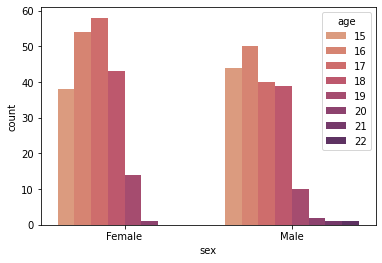

In [25]:
sns.countplot(x='sex', hue='age', data=df, palette='flare')
plt.show()

학교와 성별, 나이 catplot

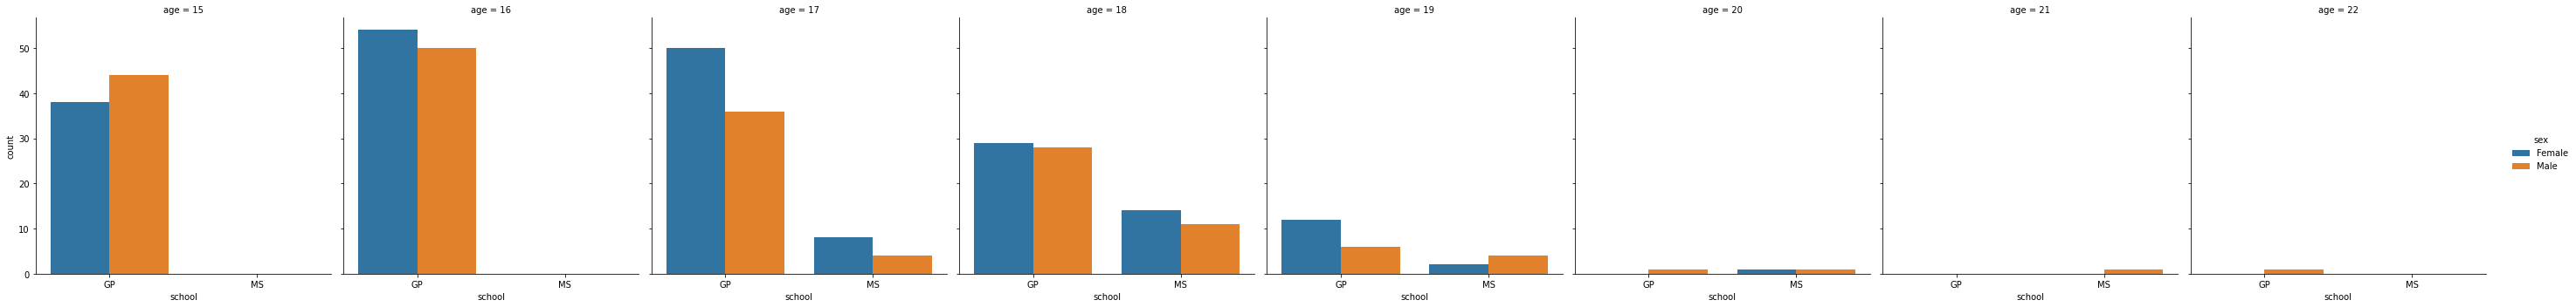

In [26]:
sns.catplot(x='school', hue='sex', col='age', data=df, kind='count')
plt.show()

거주지 countplot

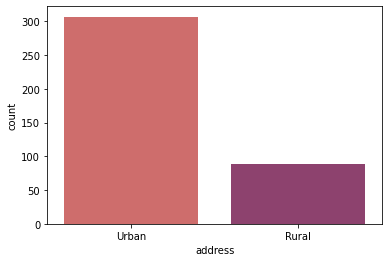

In [27]:
# Checking The Address Column
mask_address = {'U':'Urban',
                'R':'Rural'}

df['address'] = df['address'].map(mask_address)
sns.countplot(x=df['address'], palette='flare')
plt.show()

<hr>

컬럼 리스트

In [28]:
cols = list(df.columns)

컬럼 자료형이 int64가 아니면 categorical_features 리스트에 추가

In [29]:
categorical_features = []

for f in cols:
    if df[f].dtype != 'int64':
        categorical_features.append(f)

그 결과

In [30]:
categorical_features

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

categorical_features 컬럼을 제외한 수치형 데이터 컬럼 간의 heatmap

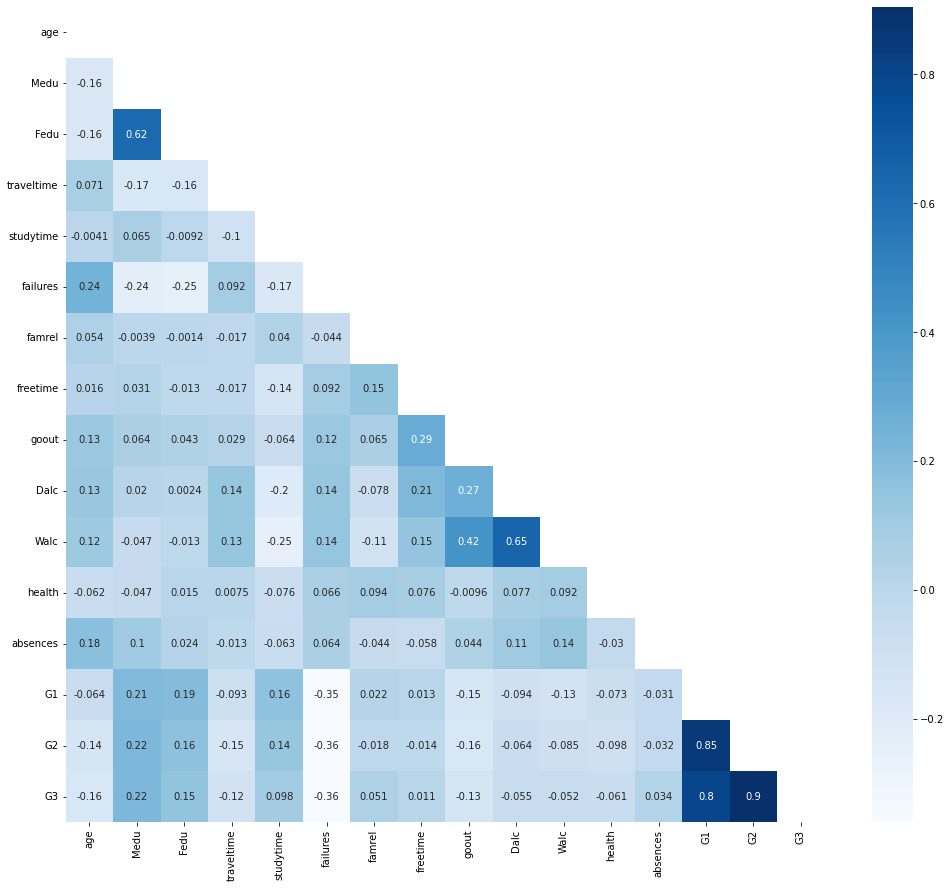

In [31]:
plt.figure(figsize=(17, 15))
df_1 = df.drop(columns=categorical_features)

corr_mask = np.triu(df_1.corr())
h_map = sns.heatmap(df_1.corr(), mask=corr_mask, annot=True, cmap='Blues')
plt.yticks(rotation=360)
plt.xticks(rotation=90)
plt.show()

df_1 상관계수

In [32]:
df_1.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


시각화

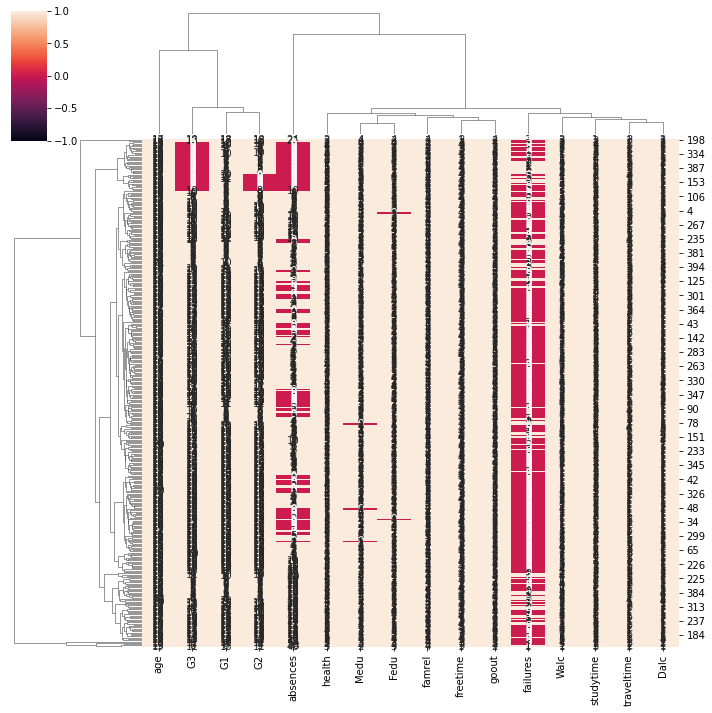

In [33]:
sns.clustermap(df_1, 
               annot = True,      # 실제 값 화면에 나타내기
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

get_dummies를 활용해 범주형 변수를 더미(지표)변수 생성

In [34]:
df = pd.get_dummies(df, columns=['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']) # columns 리스트가 categorical_features

그 결과 최종 데이터

In [35]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False


컬럼 확인

In [36]:
df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_Female', 'sex_Male',
       'address_Rural', 'address_Urban', 'famsize_GT3', 'famsize_LE3',
       'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

<hr>

상관계수

In [37]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,...,0.103063,-0.103063,0.086632,-0.086632,0.209081,-0.209081,0.112094,-0.112094,-0.164669,0.164669
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,...,-0.108277,0.108277,-0.193263,0.193263,-0.168845,0.168845,-0.201463,0.201463,-0.039681,0.039681
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,...,-0.112643,0.112643,-0.157177,0.157177,-0.174566,0.174566,-0.127507,0.127507,-0.015602,0.015602
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,...,0.007766,-0.007766,0.033338,-0.033338,0.083508,-0.083508,0.111302,-0.111302,-0.021962,0.021962
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,...,-0.089877,0.089877,-0.081325,0.081325,-0.175081,0.175081,-0.059422,0.059422,-0.053285,0.053285
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,...,0.069341,-0.069341,0.100734,-0.100734,0.300316,-0.300316,0.063451,-0.063451,-0.093137,0.093137
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,...,-0.040687,0.040687,0.003581,-0.003581,-0.024319,0.024319,-0.032768,0.032768,0.063816,-0.063816
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,...,-0.089728,0.089728,0.024696,-0.024696,0.061244,-0.061244,-0.051286,0.051286,0.011182,-0.011182
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,...,-0.046088,0.046088,-0.004612,0.004612,0.039700,-0.039700,-0.074370,0.074370,-0.007870,0.007870
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,...,0.066508,-0.066508,0.084849,-0.084849,0.069828,-0.069828,-0.036210,0.036210,-0.015121,0.015121


전체 컬럼 히트맵

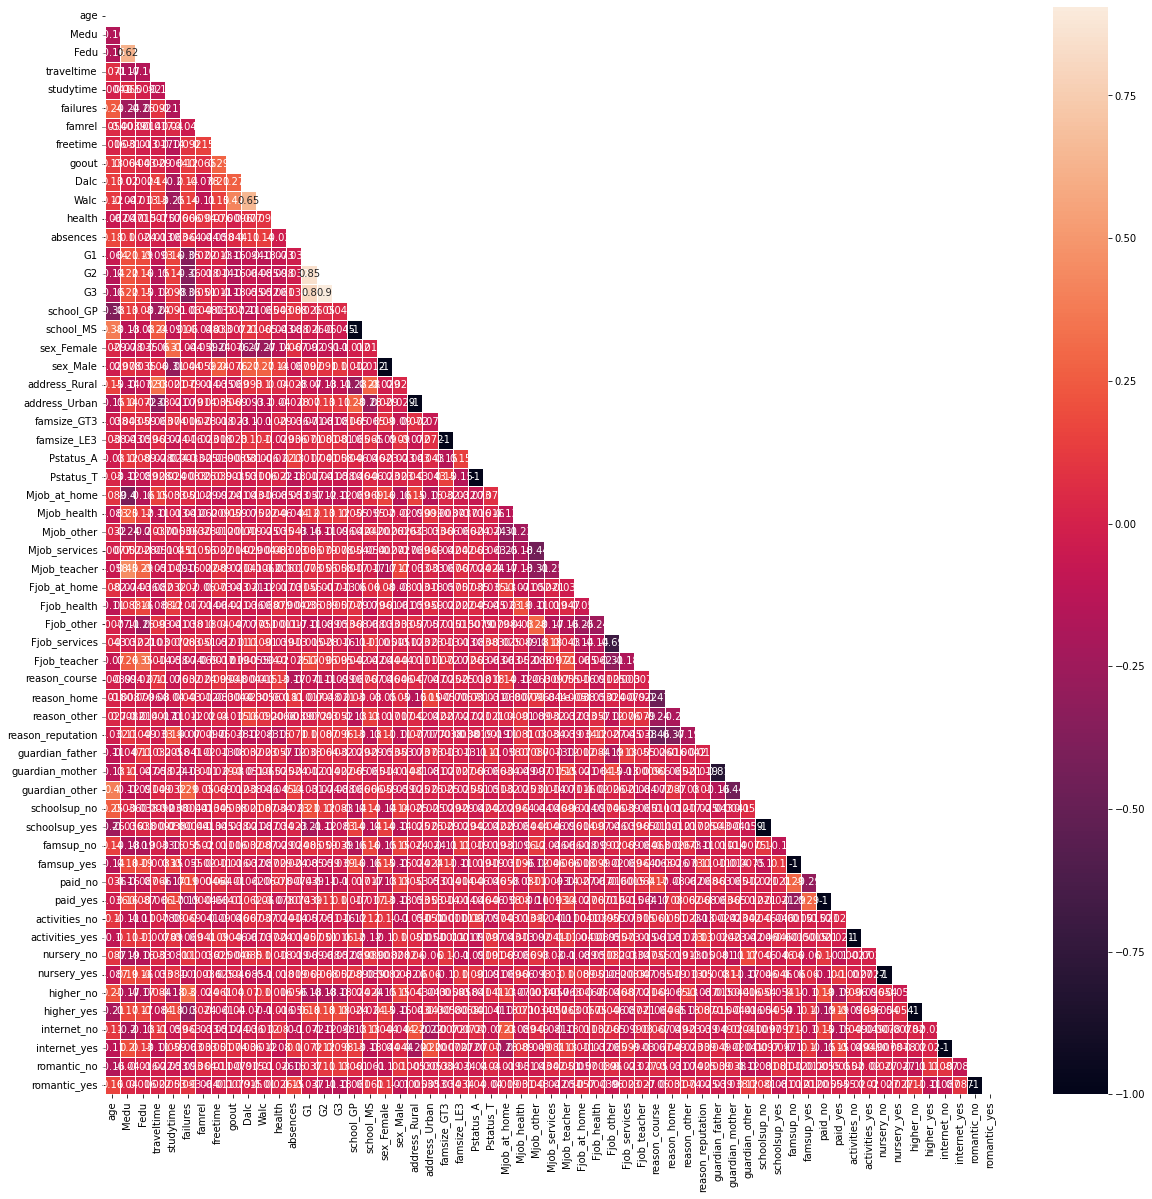

In [38]:
plt.figure(figsize=(20,20))
corr_mask = np.triu(df.corr())
h_map = sns.heatmap(df.corr(), mask=corr_mask, annot=True, linewidth=0.5)
plt.yticks(rotation=360)
plt.xticks(rotation=90)
plt.show()

<hr>

G3 column 제외

In [39]:
features=list(df.drop(columns='G3'))
features

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'school_GP',
 'school_MS',
 'sex_Female',
 'sex_Male',
 'address_Rural',
 'address_Urban',
 'famsize_GT3',
 'famsize_LE3',
 'Pstatus_A',
 'Pstatus_T',
 'Mjob_at_home',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_at_home',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_course',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_father',
 'guardian_mother',
 'guardian_other',
 'schoolsup_no',
 'schoolsup_yes',
 'famsup_no',
 'famsup_yes',
 'paid_no',
 'paid_yes',
 'activities_no',
 'activities_yes',
 'nursery_no',
 'nursery_yes',
 'higher_no',
 'higher_yes',
 'internet_no',
 'internet_yes',
 'romantic_no',
 'romantic_yes']

<hr>

- 우리는 모델을 개발할때, 범용적으로 사용할 수 있는 모델을 만들려고 한다.
> Unseen data 에 대하여 예측 또는 분류를 하는 것이 목표
> - 여기서 unseen data란, 우리의 모델이 처음 보는 데이터셋, 또는 학습해 보지 않은 데이터를 말한다.
> - 모델이 실제로 적용되었을때는 처음보는 데이터에 대하여 예측 또는 분류를 할 것이기 때문에, 그만큼 모델의 unseen data에 대한 성능이 좋아야 한다는 것을 알 수 있다.

- 그래서 dataset을 나누지 않고 전부 학습에 사용해 버린다면, 해당 dataset에 대하여만 성능이 좋은 모델을 만들게 될 것이고, 개발한 모델에 대한 성능을 점검 할 수 없을 뿐만 아니라, 실제로 모델이 적용되었을때 좋은 성능을 기대하지는 못 할 것이다. 
- => 따라서 우리가 가지고 있는 dataset을 어떻게 나누고 사용하는지 매우 중요하다.

> 그럼 dataset을 어떻게 분할시키는게 좋을까? 
>> 가장 기본적인 분할법은 전체 dataset 을 train set과 test set으로 나누는 것
>> - 전체 dataset 의 80%는 train set으로, 나머지 20%는 test set으로 분류하게 된다. 이는 train set을 이용하여 모델을 학습시키고, test set을 이용하여 모델의 성능을 평가하기 위함이다.
> 하지만 단순히 train 과 test set으로만 나누게 된다면 모델의 성능 검정을 한번 밖에 할 수 없고, test set에 대한 결과를 토대로 모델을 수정하게 된다면 overfitting이 발생할 가능성이 높아지게 된다. 
- 따라서 우리는 train set을 한번 더 train set과 validation set으로 나누게 된다. 아래의 figure에서 보여지듯이, 대다수의 경우에는 전체 데이터셋을 train, validation, test set을 각 6:2:2 비율로 나누어 사용하게 된다.

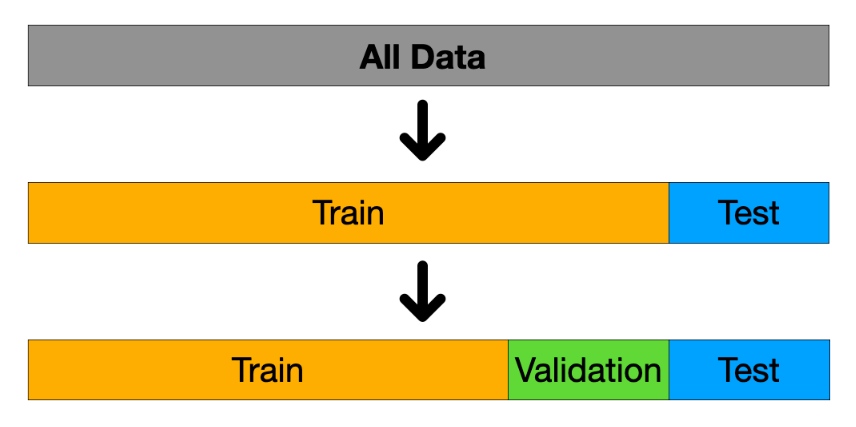

1) Train set
- 온전히 모델의 학습만을 위해서 사용
- Train set을 통해 모델을 학습시키고, parameter나 feature등을 수정해서 모델의 성능을 높이는 작업을 거칠때 사용
   
2) Validation Set
- Validation set과 test set은 모델의 학습에 직접적으로 관여하지 않는다는 점에서 공통점을 가진다
- 그러나, validation set은 학습이 끝난 모델에 적용시켜 test set을 이용한 모델의 평가로 넘어가기 이전에 최종적으로 모델을 fine tuning하는데에 사용
- 학습이 완료된 모델이라고 하더라도 epoch을 몇번 돌릴 것인지, 또는 learning rate의 설정은 어떻게 할 것인지 등에 따라 모델의 성능이 달라질 수 있기 때문에 -> 우리는 validation set을 통해 우리가 만든 모델이 test set 에서, 그리고 실제로 배포 되었을때 높은 성능을 낼 수 있도록 만들어 주는 것
   
3) Test Set
- Test set은 최종적으로 우리가 만든 모델의 성능을 평가하기 위한 데이터셋이기 때문에 모델의 학습에는 전혀 사용되지 않는다
- Test set을 통해 우리의 모델이 배포된 이후에 실사용 되었을때 모델이 얼마나 좋은 성능을 발휘 할 수 있을지 알아보는 것
- 앞서 이야기 했듯이, 모델이 실상에 사용 되었을때도 성공적이기 위해서는 unseen data에 대해 좋은 성능을 발휘하는 것이 매우 중요한데, test set이 unseen data의 역할을 해주어 우리가 만든 모델의 성능을 효과적으로 평가할 수 있도록 도와주는 것

<hr>

train:validate:test = 49:21:30
- Train set: 49% (1 - 0.3)
- Validation set: 21% (0.3 * 0.7 = 0.21)
- Test set: 30% (0.3)
> 전체 데이터 중 49%를 Train set으로 사용하고, 나머지 51%를 Test set으로 분리한 후, 이 Test set 중 30%를 다시 Validation set으로 사용한다. 따라서 전체 데이터에 대한 비율은 49% Train, 21% Validation, 30% Test가 된다.

In [40]:
X = df[features].values
y = df['G3'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=0)

선형회귀

1. Linear Regression
- 선형회귀모델는 종속변수 Y를 독립변수 X들 간의 선형결합(linear combination )으로 설명하고자 하는 모델을 말한다. 여기서 선형결합이라 함은 독립변수 X 간의 선형 관계가 아니라 X의 회귀계수(보통 beta)들간의 선형관계일 때를 말한다. 

#### 2.2 (학습모델 구축) 모델 구축 및 해석 (예시. 잔차, 변수 별 계수 및 p-value, adj. R^2, 모델 유의성 F검정 등 수업에서 학습한 내용 일체)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

모델 해석

검증 데이터 성능 측정 결과

In [56]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"Mean Squared Error on Validation Set: {mse_val}")
print(f"Mean Absolute Error on Validation Set: {mae_val}")
print(f"R^2 Score on Validation Set: {r2_val}")

Mean Squared Error on Validation Set: 7.139595979667572
Mean Absolute Error on Validation Set: 1.6307593655873494
R^2 Score on Validation Set: 0.7675274766796651


테스트 데이터 성능 측정 결과

In [58]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error on Test Set: {mse_test}")
print(f"Mean Absolute Error on Validation Set: {mae_test}")
print(f"R^2 Score on Test Set: {r2_test}")

Mean Squared Error on Test Set: 3.0500000284777746
Mean Absolute Error on Validation Set: 1.1910129123263888
R^2 Score on Test Set: 0.8581955143710422


<hr>

선형회귀 분석 가시화

1) Residual Plot

Since a residual is the "leftover" value after subtracting the expected value from the actual value 
- and the expected value is obtained through a a linear model such as a line of best fit
> a residual plot shows how the data points deviate from the model.

검증 데이터에 대한 잔차 plot

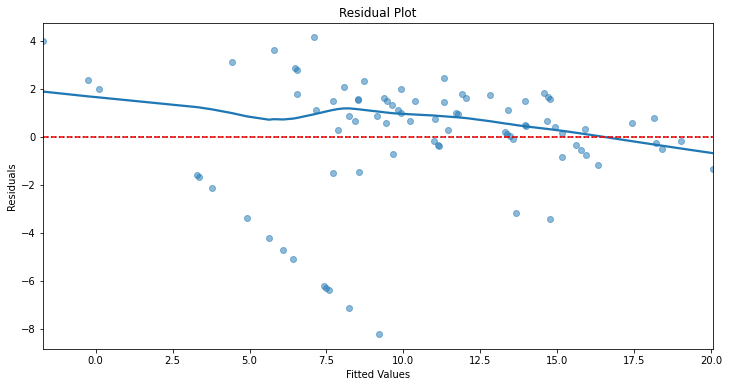

In [59]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate residuals 잔차
residuals = y_val - y_val_pred

# Create a residual plot
plt.figure(figsize=(12, 6))
sns.residplot(x=y_val_pred, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})

plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

테스트 데이터에 대한 잔차 plot

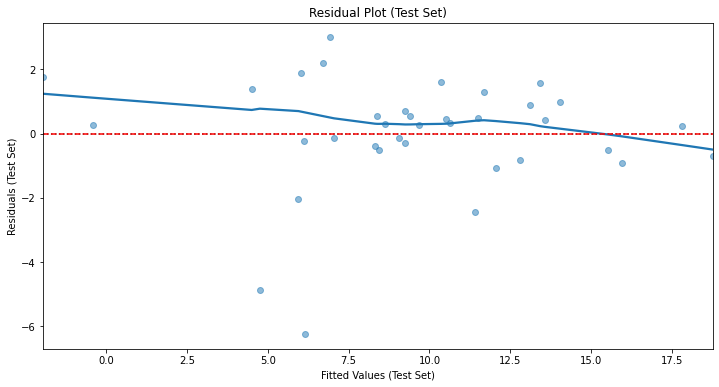

In [60]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate residuals for the test set
residuals_test = y_test - y_test_pred

# Create a residual plot for the test set
plt.figure(figsize=(12, 6))
sns.residplot(x=y_test_pred, y=residuals_test, lowess=True, scatter_kws={'alpha': 0.5})

plt.title('Residual Plot (Test Set)')
plt.xlabel('Fitted Values (Test Set)')
plt.ylabel('Residuals (Test Set)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

<hr>

2) QQ Plot
- Quantile-Quantile plot
- Quantile: 분위수 = 데이터를 오름차순/내림차순 정렬한 뒤, 전체 데이터를 특정 개수로 나눌 때 기준이 되는 수
- X, Y축 척도가 분위수인 plot
- 두 확률 분포를 그것들의 quantiles를 그려 넣음으로써 비교
> - 주어진 데이터가 정규분포인가?
> - 주어진 세트의 데이터가 같은 분포인가? (!)
> - 회귀분석 etc에서 잔차의 정규성 판단

<Figure size 576x576 with 0 Axes>

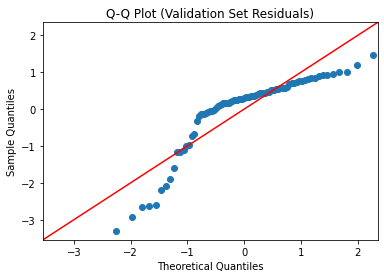

In [63]:
import statsmodels.api as sm

# Create a QQ plot for the validation set residuals
residuals_standardized = (residuals - np.mean(residuals)) / np.std(residuals)

plt.figure(figsize=(8, 8))
sm.qqplot(residuals_standardized, line='45', fit=True)
plt.title('Q-Q Plot (Validation Set Residuals)')
plt.show()

<Figure size 576x576 with 0 Axes>

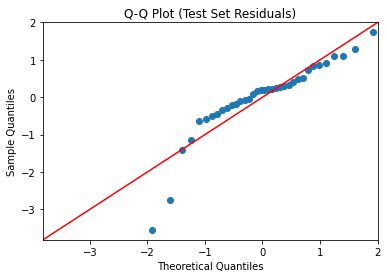

In [64]:
# Create a QQ plot for the test set residuals
residuals_test_standardized = (residuals_test - np.mean(residuals_test)) / np.std(residuals_test)

plt.figure(figsize=(8, 8))
sm.qqplot(residuals_test_standardized, line='45', fit=True)
plt.title('Q-Q Plot (Test Set Residuals)')
plt.show()

<hr>

3) Residual vs Fitted plot
- 종속변수와 독립변수간에 선형성
- x축에 Y^를 y축에는 잔차 ei로 하여금 그래프를 출력
- 선형회귀에서 오차는 평균이 0이고 분산이 일정한 정규분포를 가정하기에 Y^와 무관하게 잔차의 평균은 0을 중심으로 일정하게 패턴 없이 분포되어 있어야 한다.

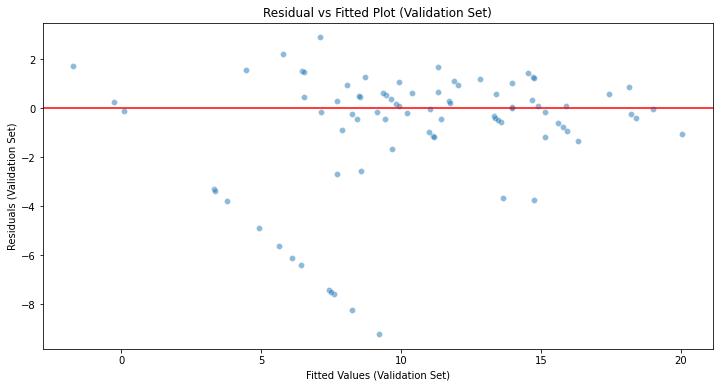

In [65]:
# Residual vs Fitted Plot for the validation set
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r')
plt.title('Residual vs Fitted Plot (Validation Set)')
plt.xlabel('Fitted Values (Validation Set)')
plt.ylabel('Residuals (Validation Set)')
plt.show()

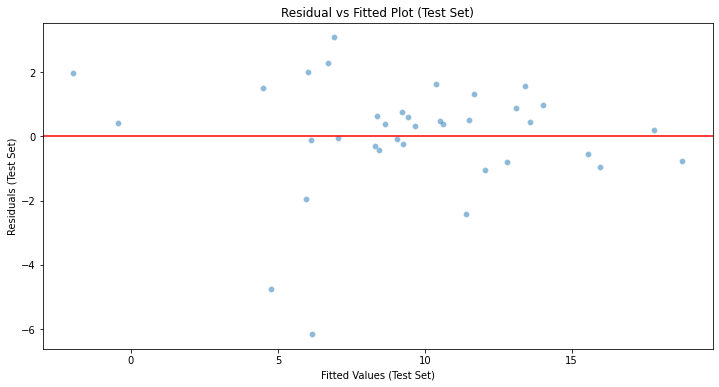

In [66]:
# Residual vs Fitted Plot for the test set
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test_pred, y=residuals_test, alpha=0.5)
plt.axhline(y=0, color='r')
plt.title('Residual vs Fitted Plot (Test Set)')
plt.xlabel('Fitted Values (Test Set)')
plt.ylabel('Residuals (Test Set)')
plt.show()

<hr>

### 회귀계수 축소법
- 회귀계수 축소법의 기본적인 공통원리는 SSE(잔차)에 Penalty를 더하여 [SSE + f(x)(= 패널티)]를 함께 축소시키는 것을 목표로 한다.
- 기본적으로 다중선형회귀와 유사하나, 계수 축소법에서는 잔차에다가 회귀계수를 최소화하는 과정을 거친다.

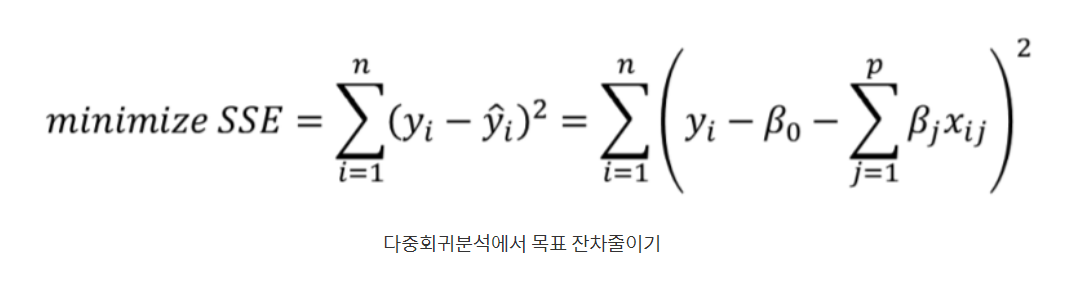

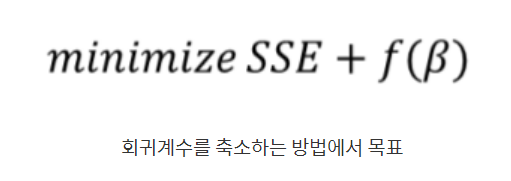

회귀계수 축소법의 종류는 3가지가 있다.   
   
1. Lasso
- f(b)에 회귀계수의 절대값의 합을 대입한다.
- Lasso : minimize sse + lambda(sigma |beta|)
- Lasso의 beta는 Ridge와 다르게 한번에 구할 수 없다. 라그랑지안을 통해 최적화를 진행할 필요가 있다. 
   
2. Ridge
- f(b)에 회귀계수의 제곱의 합을 대입한다. 
- Ridge : minimize sse + lambda(sigma beta^2)
- 위의 식에서 b(beta)는 결과적으로 라그랑지안 미분을 통해  b = (X`X + lambda*I)^(-1)*X`*y 로 구해진다. 
- 다중공선성은 X들간의 강한 선형관계가 있을때 발생한다. 이 경우 X`X의 역행렬을 구할 수 없고 Ridge는 X`X를 구할 수 있도록 강제로 작은 값을 대각행렬에 추가한 것이다. 

> 위에 유사해보이는 두 회귀계수 축소법은 공통점과 차이점이 있다. 먼저, 두 식의 lambda값 모두 parameter로 크면 클 수록 보다 많은 회귀계수를 0으로 수렴시킨다. 두 방법 모두 SSE를 희생해 계수를 축소하는 방법이다. 그리고 적절한 람다 값은 람다값을 변형시키며 MSE가 최소일 때의 람다를 탐색해 찾아내야 한다. -> 두 회귀모델의 공통점은 바로 "penalized regression"이라는 것이다. 
  
>>  Ridge와 Lasso는 차이점 또한 존재한다. Ridge와 Lasso의 가장 큰 차이는 Ridge는 계수를 0에 근사하도록 축소하나, Lasso는 계수를 완전하게 0으로 축소시킨다. 그렇기에 Ridge의 경우 입력변수가 전반적으로 비슷한 수준으로 출력변수에 영향을 미치는 경우 사용하고, Lasso의 경우 출력변수에 미치는 입력변수의 영향력 편차가 큰 경우에 사용한다.

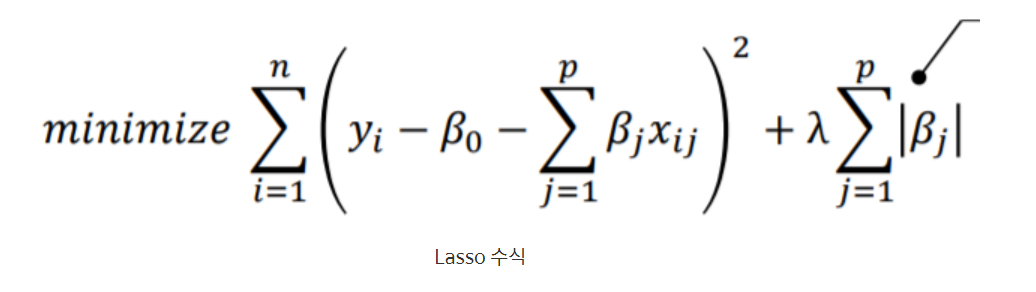

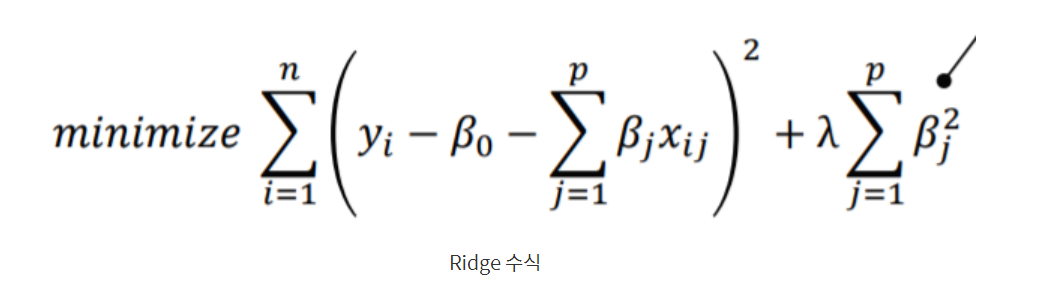

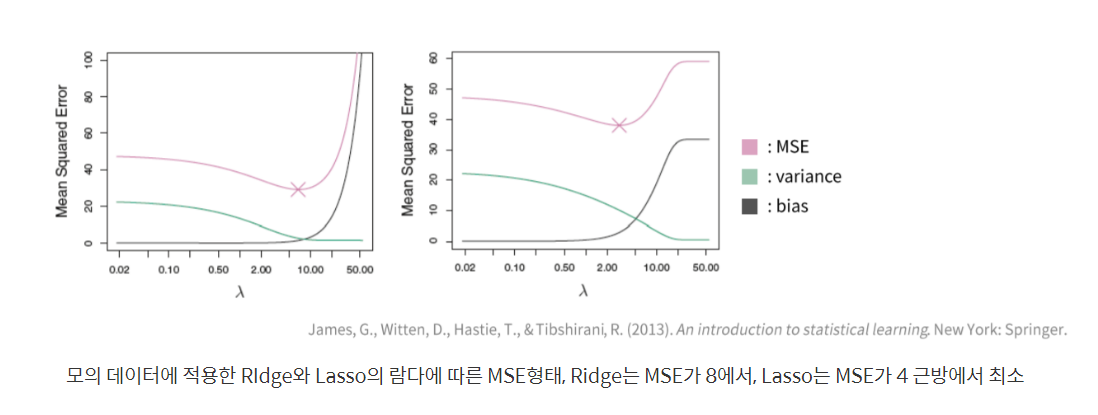

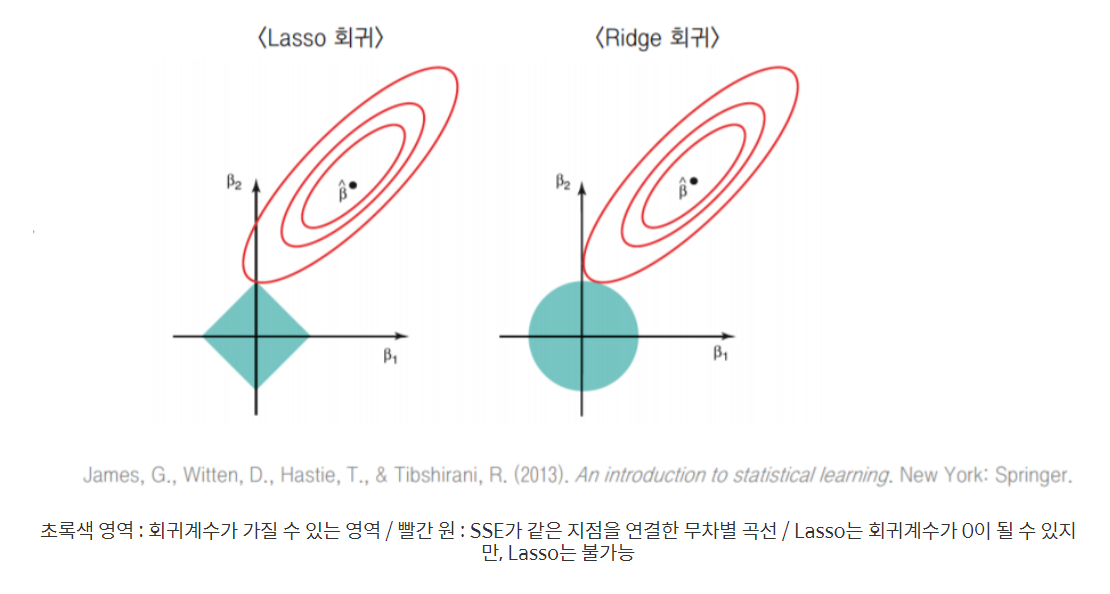

3. Elastic-Net
- Elastic-Net 회귀는 Lasso와 Ridge의 하이브리드 회귀모델이다. 
- lambda_1, lambda_2는 각각 Ridge와 Lasso 속성에 대한 강도를 조절하는 것이다. 이를 통해,Ridge의 정규화 속성과 Lasso의 변수축소 속성을 둘 다 갖는 모델이다.
- Lasso는 상관관계가 있는 다수의 변수들 중 하나를 무작위 선택하여 계수를 축소하는 반면, Elastic-Net은 상관성이 높은 다수의 변수들을 모두 선택하거나 제거한다. 
- 이러한 방식을 통해 group effect를 유도한다. 따라서 다수의 변수간에 상관관계가 존재할 때 유용하다. 

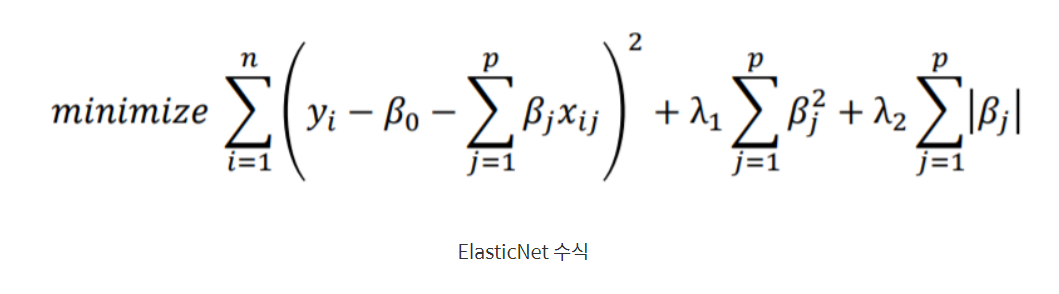

> ※ 보통은 성능이 Ridge와 Elastic-Net이 좋다고 하나, 절대적이지 않다고 한다. 그렇기에 변수선택법이든, 계수축소법이든 모형을 단순화 시킬때 여러 방면으로 확인해보는 작업이 필요하다.
>> "No Free Lunch Theorem"

Lasso. Ridge, Elasticnet model

In [181]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize the linear regression model
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1) 
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [182]:
# Train the models on the training set
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
elasticnet_model.fit(X_train, y_train)

ElasticNet(alpha=0.1)

검증 데이터

In [183]:
# Make predictions on the validation set
y_val_pred_lasso = lasso_model.predict(X_val)
y_val_pred_ridge = ridge_model.predict(X_val)
y_val_pred_elasticnet = elasticnet_model.predict(X_val)

검증 성능 평가

In [184]:
# Evaluate the models on the validation set
mse_val_lasso = mean_squared_error(y_val, y_val_pred_lasso)
r2_val_lasso = r2_score(y_val, y_val_pred_lasso)
mae_val_lasso = mean_absolute_error(y_val, y_val_pred_lasso)

mse_val_ridge = mean_squared_error(y_val, y_val_pred_ridge)
r2_val_ridge = r2_score(y_val, y_val_pred_ridge)
mae_val_ridge = mean_absolute_error(y_val, y_val_pred_ridge)

mse_val_elasticnet = mean_squared_error(y_val, y_val_pred_elasticnet)
r2_val_elasticnet = r2_score(y_val, y_val_pred_elasticnet)
mae_val_elasticnet = mean_absolute_error(y_val, y_val_pred_elasticnet)

In [186]:
print("Lasso Regression:")
print(f"Mean Squared Error on Validation Set: {mse_val_lasso}")
print(f"Mean Absolute Error on Validation Set: {mae_val_lasso}")
print(f"R^2 Score on Validation Set: {r2_val_lasso}")
print("\n")

print("Ridge Regression:")
print(f"Mean Squared Error on Validation Set: {mse_val_ridge}")
print(f"Mean Absolute Error on Validation Set: {mae_val_ridge}")
print(f"R^2 Score on Validation Set: {r2_val_ridge}")
print("\n")

print("Elastic Net Regression:")
print(f"Mean Squared Error on Validation Set: {mse_val_elasticnet}")
print(f"Mean Absolute Error on Validation Set: {mae_val_elasticnet}")
print(f"R^2 Score on Validation Set: {r2_val_elasticnet}")

Lasso Regression:
Mean Squared Error on Validation Set: 7.236331708211757
Mean Absolute Error on Validation Set: 1.520381698967571
R^2 Score on Validation Set: 0.764377662744263


Ridge Regression:
Mean Squared Error on Validation Set: 7.136912974774876
Mean Absolute Error on Validation Set: 1.6303815139559505
R^2 Score on Validation Set: 0.7676148380540709


Elastic Net Regression:
Mean Squared Error on Validation Set: 6.99578351808165
Mean Absolute Error on Validation Set: 1.5142032858069643
R^2 Score on Validation Set: 0.7722101570337073


테스트 데이터

In [187]:
# Make predictions on the test set
y_test_pred_lasso = lasso_model.predict(X_test)
y_test_pred_ridge = ridge_model.predict(X_test)
y_test_pred_elasticnet = elasticnet_model.predict(X_test)

테스트 성능 평가

In [188]:
# Evaluate the models on the test set
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mse_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

mse_test_elasticnet = mean_squared_error(y_test, y_test_pred_elasticnet)
mse_test_elasticnet = mean_absolute_error(y_test, y_test_pred_elasticnet)
r2_test_elasticnet = r2_score(y_test, y_test_pred_elasticnet)

In [189]:
print("Lasso Regression:")
print(f"Mean Squared Error on Test Set: {mse_test_lasso}")
print(f"Mean Absolute Error on Test Set: {mse_test_lasso}")
print(f"R^2 Score on Test Set: {r2_test_lasso}")
print("\n")

print("Ridge Regression:")
print(f"Mean Squared Error on Test Set: {mse_test_ridge}")
print(f"Mean Absolute Error on Test Set: {mse_test_ridge}")
print(f"R^2 Score on Test Set: {r2_test_ridge}")
print("\n")

print("Elastic Net Regression:")
print(f"Mean Squared Error on Test Set: {mse_test_elasticnet}")
print(f"Mean Absolute Error on Test Set: {mse_test_elasticnet}")
print(f"R^2 Score on Test Set: {r2_test_elasticnet}")

Lasso Regression:
Mean Squared Error on Test Set: 2.714262961473256
Mean Absolute Error on Test Set: 2.714262961473256
R^2 Score on Test Set: 0.873805029665674


Ridge Regression:
Mean Squared Error on Test Set: 1.1906832796588616
Mean Absolute Error on Test Set: 1.1906832796588616
R^2 Score on Test Set: 0.85818495738555


Elastic Net Regression:
Mean Squared Error on Test Set: 1.1026597750925318
Mean Absolute Error on Test Set: 1.1026597750925318
R^2 Score on Test Set: 0.8701507207694


- Ridge, Lasso, elasticNet 회귀 분석에서는 multicollinearity 다중공선성 문제와 over-fitting 과적합 문제 방지를 위해 아래와 같은 정규화 방식이 적용되었다.

> Ridge 회귀 모델은  L2 정규화
> - Lasso 회귀모델은 L1 정규화
> - elasticNet은 Ridge의 L2와 Lasso의 L1 정규화 혼합
>> + 여기서 multicollinearity 다중공선성이란 독립변수 x들간의 강한 상관관계가 나타나서, 독립변수들이 독립적이지 않는 문제가 발생하게 되는 현상을 말한다. 이 경우 coefficient 추정치가 부정확해지고 standard error 값이 높아지게 된다.